<a href="https://colab.research.google.com/github/duttapratikcsc/ImageClassification/blob/master/FashionMNist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow==2.0.0-beta1

     |████████████████████████████████| 87.9MB 86kB/s 
     |████████████████████████████████| 3.1MB 38.9MB/s 
     |████████████████████████████████| 501kB 48.2MB/s 
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0-beta1


In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


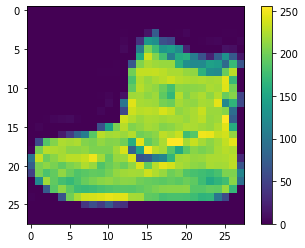

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0 

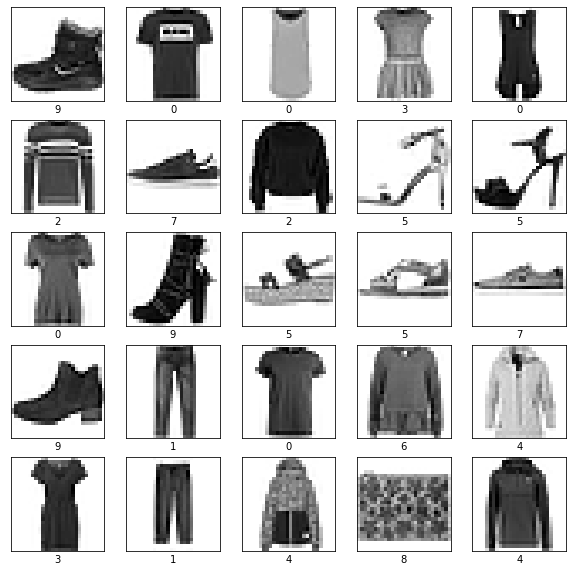

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(train_labels[i])
  

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')                  
])

In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
model.fit(train_images, train_labels, epochs=10, batch_size=32 )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.5032 - accuracy: 0.8230
Epoch 2/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.3784 - accuracy: 0.8630
Epoch 3/10
60000/60000 [==============================] - 7s 109us/sample - loss: 0.3415 - accuracy: 0.8764
Epoch 4/10
60000/60000 [==============================] - 6s 96us/sample - loss: 0.3182 - accuracy: 0.8830
Epoch 5/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2974 - accuracy: 0.8896
Epoch 6/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.2851 - accuracy: 0.8946
Epoch 7/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2727 - accuracy: 0.8982
Epoch 8/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2593 - accuracy: 0.9024
Epoch 9/10
60000/60000 [==

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("\nTest accuracy:", test_acc)

10000/10000 [==============================] - 0s 38us/sample - loss: 0.3343 - accuracy: 0.8813

Test accuracy: 0.8813


In [15]:
prediction = model.predict(test_images)
prediction[0]

array([9.1628375e-05, 5.7700458e-09, 7.8207208e-08, 3.3557263e-10,
       1.6142295e-08, 4.9189907e-03, 1.1103001e-06, 1.3252813e-02,
       8.8090708e-08, 9.8173529e-01], dtype=float32)

In [16]:
np.argmax(prediction[0])

9

In [17]:
test_labels[0]

9

In [0]:
def plot_image(i, prediction_array, true_label, img):
  prediction_array, true_label, img = prediction_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img,cmap=plt.cm.binary)

  predicted_label = np.argmax(prediction_array)
  if prediction_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format())